# Trabalho 2

## Aluno : Gabriel Borin Macedo
## RA : 197201

# Descrição : Esse _script_ é o relatório do _trabalho 2_.

## Parte 0 : _Pré-sets_ de alguns dados iniciais do script
Para esta parte, este notebook será inicializado com as bibliotecas para execução do código, criação de funções uteis para o programa e carregamento das imagens de teste

### Criação da função de plot para o programa
Para esta célula, será criada uma função que faz o plot de images. Essa função foi criada para evitar a repetição de código desnecessário

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os


def info_segment(img_mask: np.ndarray) -> tuple[int, int, float]:
    """

    :param img_mask:
    :return:
    """
    # Contando a quantidade de pixels
    n_segmented_pixels = np.count_nonzero(img_mask == 0)
    img_total_pixels = img_mask.shape[0] * img_mask.shape[1]
    percent_segmented_pixels = n_segmented_pixels / img_total_pixels

    print("valor mínimo da máscara : {}".format(img_mask.min()))
    print("valor máximo da máscara : {}".format(img_mask.max()))

    print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                            img_total_pixels,
                                                                                            percent_segmented_pixels))

    return n_segmented_pixels, img_total_pixels, percent_segmented_pixels


def plot_figures_in_line(img1: np.ndarray, title1: str, img2: np.ndarray, title2: str, **kwargs: dict):
    """

    :param img1:
    :param title1:
    :param img2:
    :param title2:
    :param kwargs:
    :return:
    """

    if "save_fig" in kwargs.keys():
        save_fig_name = kwargs.pop("save_fig")
        save_dir = kwargs.pop("save_dir")

    else:
        save_fig_name = ""
        save_dir = ""

    plt.figure(figsize=(15, 15))

    # imagem original
    plt.subplot(1, 2, 1)
    plt.title(title1)
    plt.axis("off")
    plt.imshow(img1, cmap="gray", vmin=img1.min(), vmax=img1.max())

    # imagem com o treshold aplicado
    plt.subplot(1, 2, 2)
    plt.title(title2)
    plt.axis("off")
    plt.imshow(img2, cmap="gray", vmin=img2.min(), vmax=img2.max())

    if save_fig_name:
        os.makedirs(save_dir, exist_ok=True)
        plt.savefig(save_dir + save_fig_name)

    plt.show()


def plot_histogrms_in_line(image: np.ndarray, binary_min: np.ndarray, thresh_min: np.ndarray) -> None:
    """

    :param image:
    :param binary_min:
    :param thresh_min:
    :return:
    """
    fig, ax = plt.subplots(2, 2, figsize=(15, 15))
    ax[0, 0].imshow(image, cmap=plt.cm.gray)

    ax[0, 0].set_title('Original')

    ax[0, 1].hist(image.ravel(), bins=256)
    ax[0, 1].set_title('Histogram')

    ax[1, 0].imshow(binary_min, cmap=plt.cm.gray)
    ax[1, 0].set_title('Thresholded (min)')

    ax[1, 1].hist(image.ravel(), bins=256)
    ax[1, 1].axvline(thresh_min, color='r')

    for a in ax[:, 0]:
        a.axis('off')
    plt.show()

def plot_figures_in_line(image: np.ndarray, mask: np.ndarray, thresh_min: np.ndarray, title1: str = "",
                           title2: str = "", **kwargs: dict) -> None:
    """

    :param image:
    :param binary_min:
    :param thresh_min:
    :return:
    """
    if "save_fig" in kwargs.keys():
        save_fig_name = kwargs.pop("save_fig")
        save_dir = kwargs.pop("save_dir")

    else:
        save_fig_name = ""
        save_dir = ""

    fig, ax = plt.subplots(2, 2, figsize=(15, 15))
    ax[0, 0].imshow(image, cmap=plt.cm.gray)

    ax[0, 0].set_title(title1)

    ax[0, 1].hist(image.ravel(), bins=256)
    ax[0, 1].set_title("Histograma {}".format(title1))

    ax[1, 0].imshow(mask, cmap=plt.cm.gray)
    ax[1, 0].set_title(title2)

    ax[1, 1].hist(image.ravel(), bins=256)
    ax[1, 1].axvline(thresh_min, color='r')

    for a in ax[:, 0]:
        a.axis('off')
    if save_fig_name:
        os.makedirs(save_dir, exist_ok=True)
        plt.savefig(save_dir + save_fig_name)

    plt.show()

### Carregamento das imagens de teste do programa
Nesta célula, serão carregado as imagens com extensão __.pgm__

In [2]:
img_baboon = cv2.imread("Imagens/baboon.pgm", -1)
img_fiducial = cv2.imread("Imagens/fiducial.pgm", -1)
img_retina = cv2.imread("Imagens/retina.pgm", -1)
img_sonnet = cv2.imread("Imagens/sonnet.pgm", -1)
img_wedge = cv2.imread("Imagens/wedge.pgm", -1)

## Parte 1 : Aplicação do método Global
Inicialmente, será definido a função do método global sendo

In [15]:
from skimage.filters import threshold_otsu


def global_method(img: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """

    :param img:
    :return:
    """
    threshold = threshold_otsu(img)
    binary_mask = (img < threshold).astype(img.dtype)
    return binary_mask, threshold

### Aplicação do **método global** nas imagens de exemplo
Agora, vamos aplicar o método nas imagens de exemplo, calcular o histograma da imagem original e encontrar a proporção de _pixels_ preto em relação a imagem original

#### Imagem _baboon_

 **Talves descrever algo do tipo de normalizar o contraste da imagem**

#### Calculando a máscara da imagem e a quantidade de pixels pretos

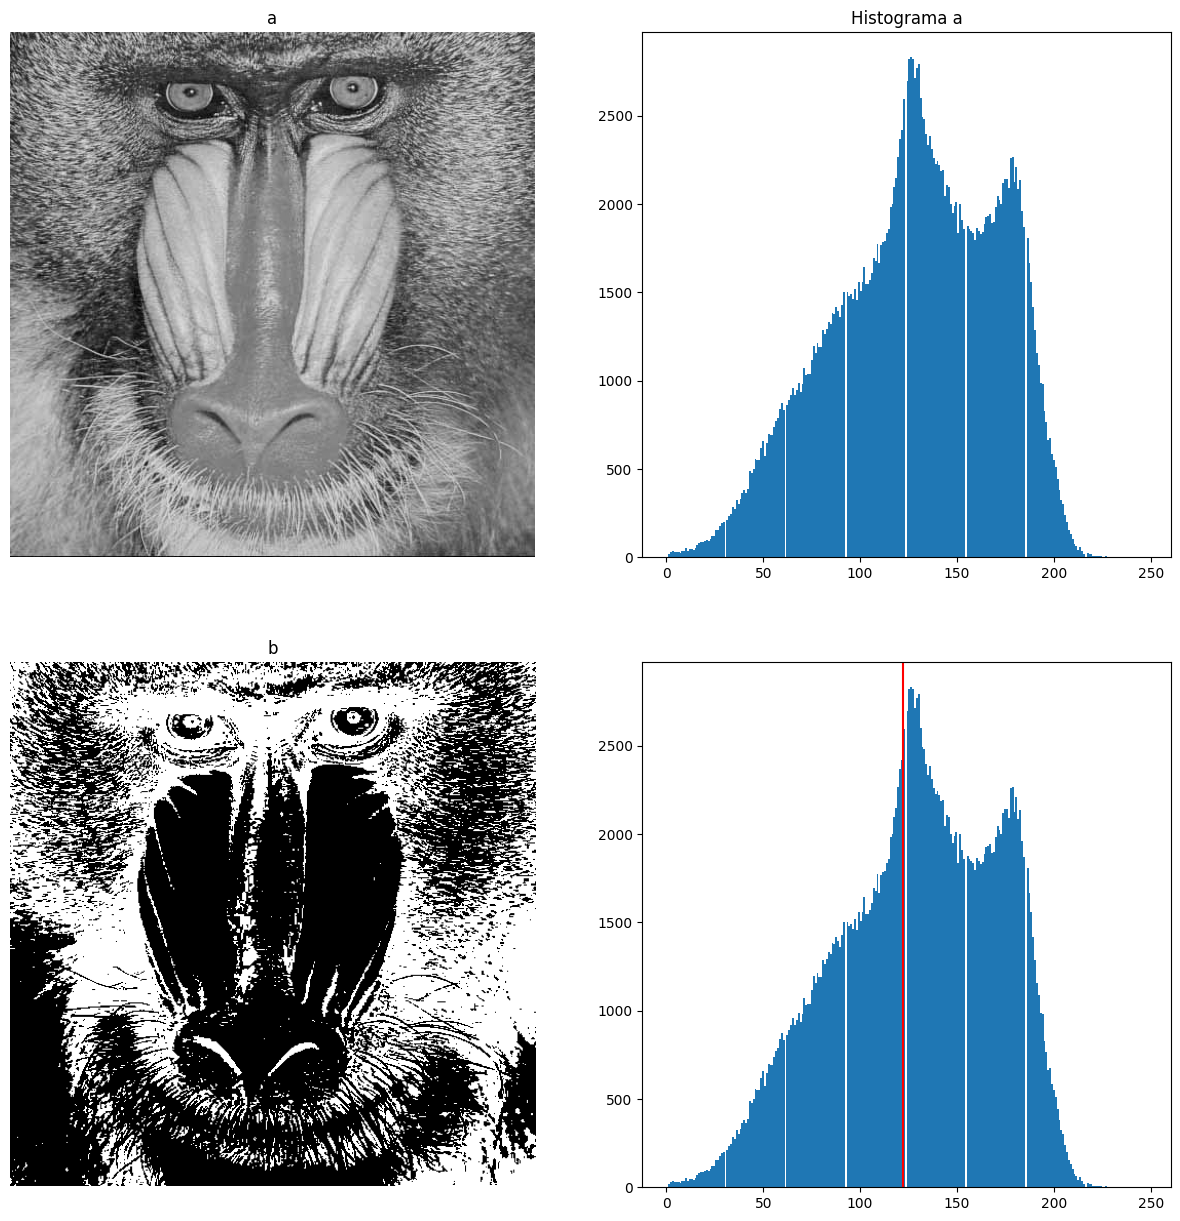

In [16]:
mask_baboon, t_baboon = global_method(img_baboon)
plot_figures_in_line(img_baboon, mask_baboon, t_baboon, "a", "b", save_fig="babbon_comparacao.png", save_dir="ResultadosImagens/MetodoGlobal/")

In [19]:
_ = info_segment(mask_baboon)

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 157347/262144 ~= 0.60 %


#### Imagem __fiducial__

##### Calculando a máscara da imagem e a quantidade de pixels preto na imagem

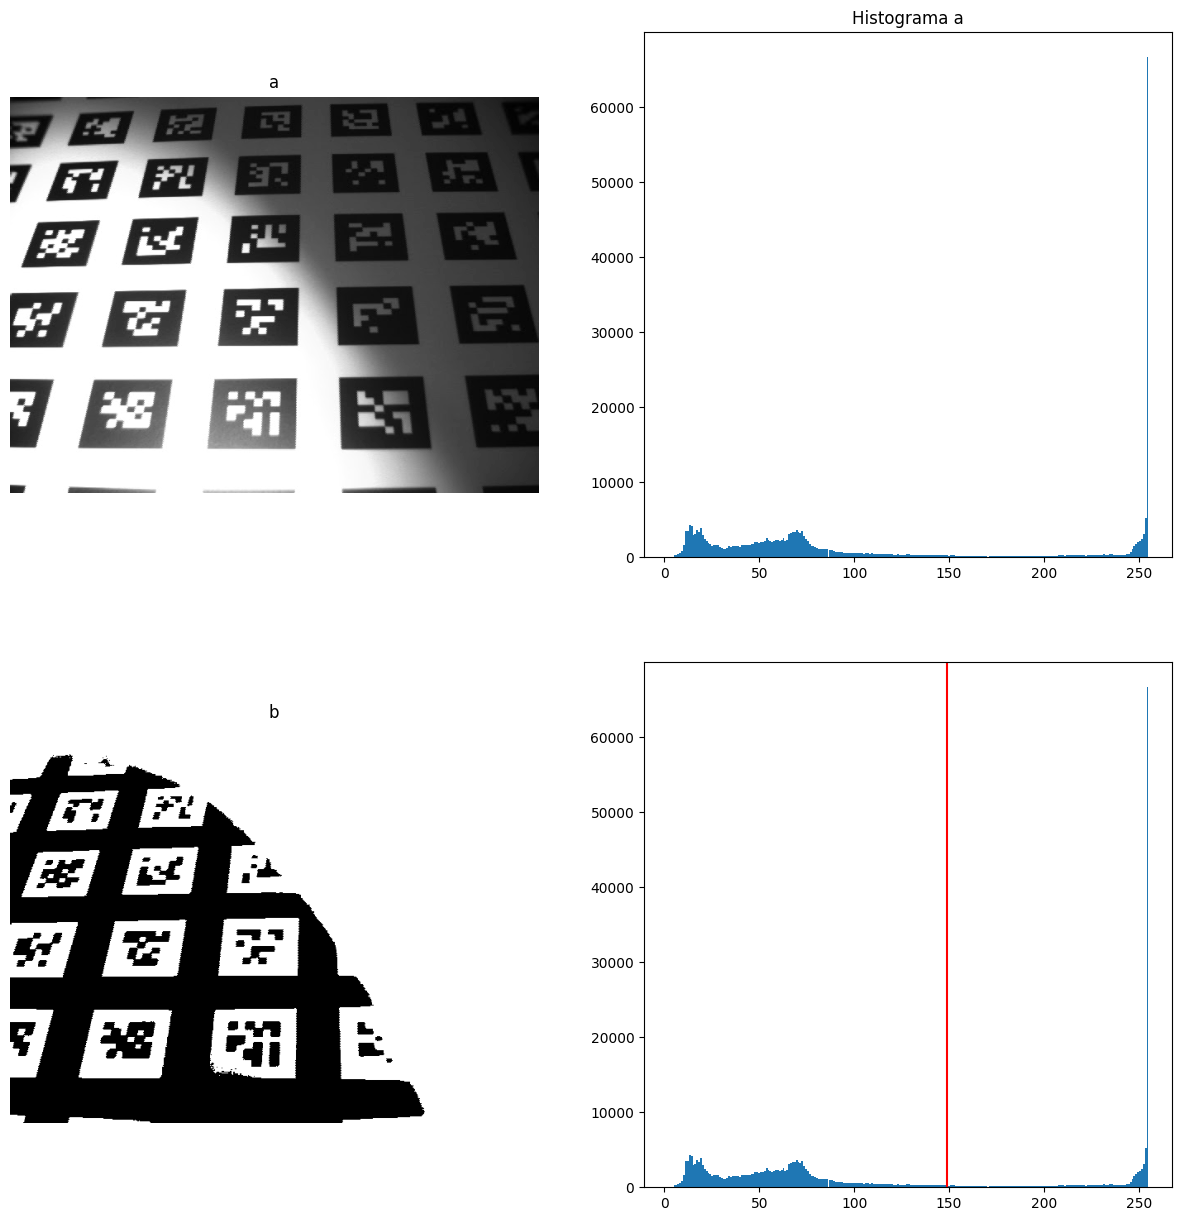

In [20]:
mask_fiducial, t_fiducial = global_method(img_fiducial)
plot_figures_in_line(img_fiducial, mask_fiducial, t_fiducial, "a", "b", save_fig="babbon_comparacao.png", save_dir="ResultadosImagens/MetodoGlobal/")

In [21]:
_ = info_segment(mask_fiducial)

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 110444/307200 ~= 0.36 %


#### Imagem __retina__

##### Calculando a máscara da imagem e a quantidade de pixels preto na imagem

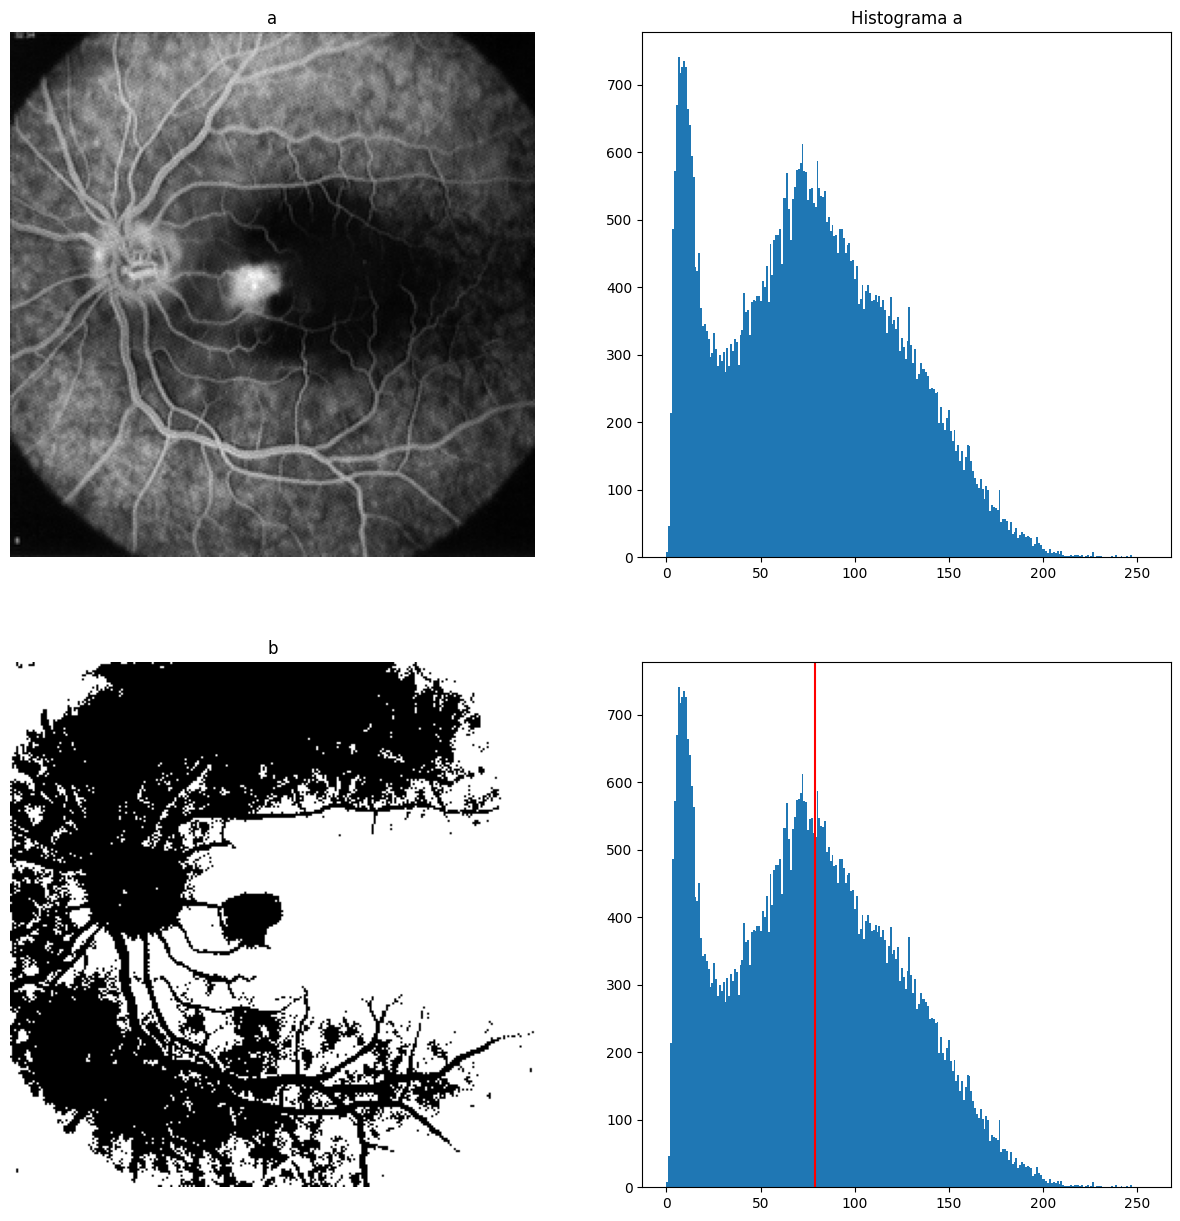

In [22]:
mask_retina, t_retina = global_method(img_retina)
plot_figures_in_line(img_retina, mask_retina, t_retina, "a", "b", save_fig="babbon_comparacao.png", save_dir="ResultadosImagens/MetodoGlobal/")

In [23]:
_ = info_segment(mask_retina)

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 30972/65536 ~= 0.47 %


#### Imagem __sonnet__

##### Calculando a máscara da imagem e a quantidade de pixels preto na imagem

141


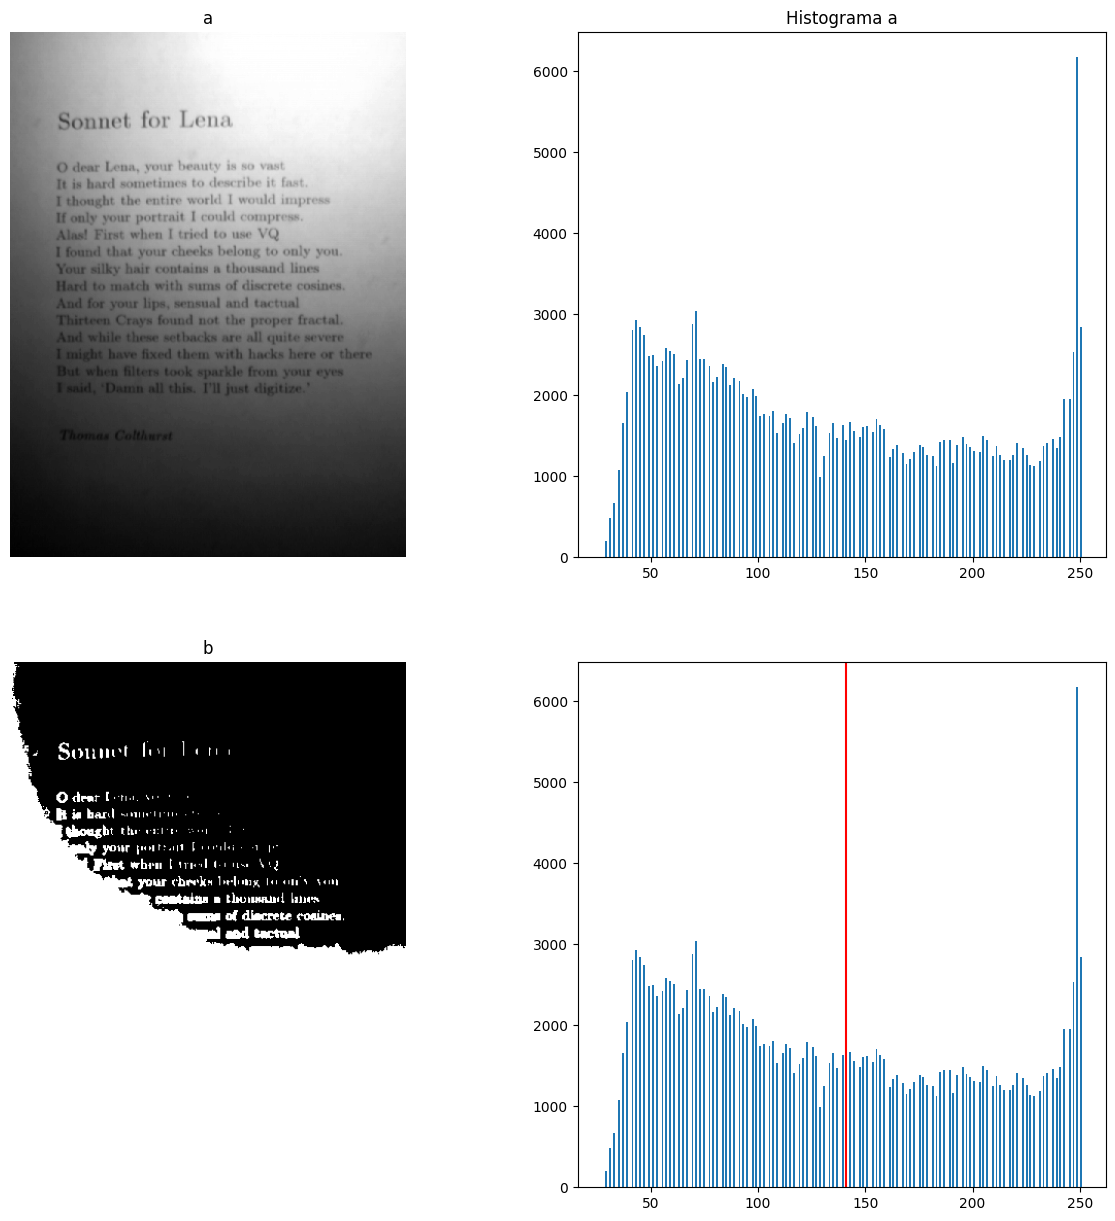

In [39]:
mask_sonnet, t_sonnet = global_method(img_sonnet)
plot_figures_in_line(img_sonnet, mask_sonnet, t_sonnet, "a", "b", save_fig="babbon_comparacao.png", save_dir="ResultadosImagens/MetodoGlobal/")

In [25]:
_ = info_segment(mask_sonnet)

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 85347/195840 ~= 0.44 %


#### Imagem __wedge__

##### Calculando

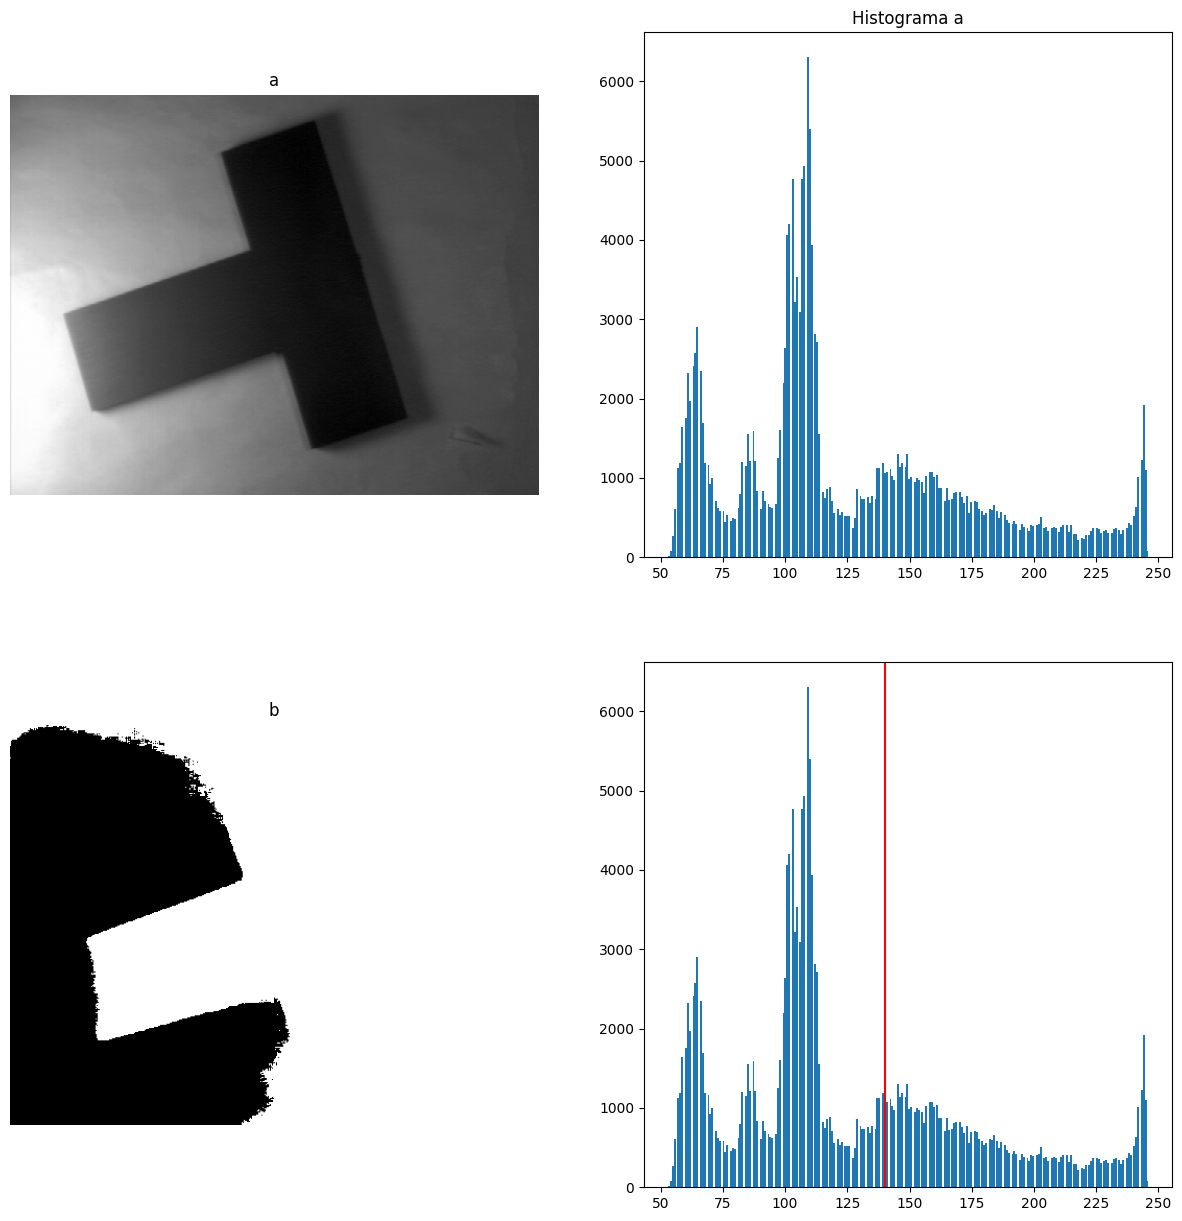

In [26]:
mask_wedge, t_wedge = global_method(img_wedge)
plot_figures_in_line(img_wedge, mask_wedge, t_wedge, "a", "b", save_fig="babbon_comparacao.png", save_dir="ResultadosImagens/MetodoGlobal/")

In [27]:
_ = info_segment(mask_wedge)

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 66517/194688 ~= 0.34 %


## Parte 2 : Método de Bernsen
Será utilizado o pacote **mahotas** para isso.
Inicialmente, iremos utilizar esse comando para instalar a biblioteca do **mahotas**

In [30]:
%pip install --upgrade numpy
from mahotas.thresholding import bernsen

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, http://gcc.lnls.br:3128/simple
Note: you may need to restart the kernel to use updated packages.


### Aplicação do **método de bérsen** nas imagens de exemplo
https://www.geeksforgeeks.org/mahotas-bernsen-local-thresholding/

#### Imagem __baboon__

##### Calculando a máscara da imagem e a quantidade de pixels preto na imagem

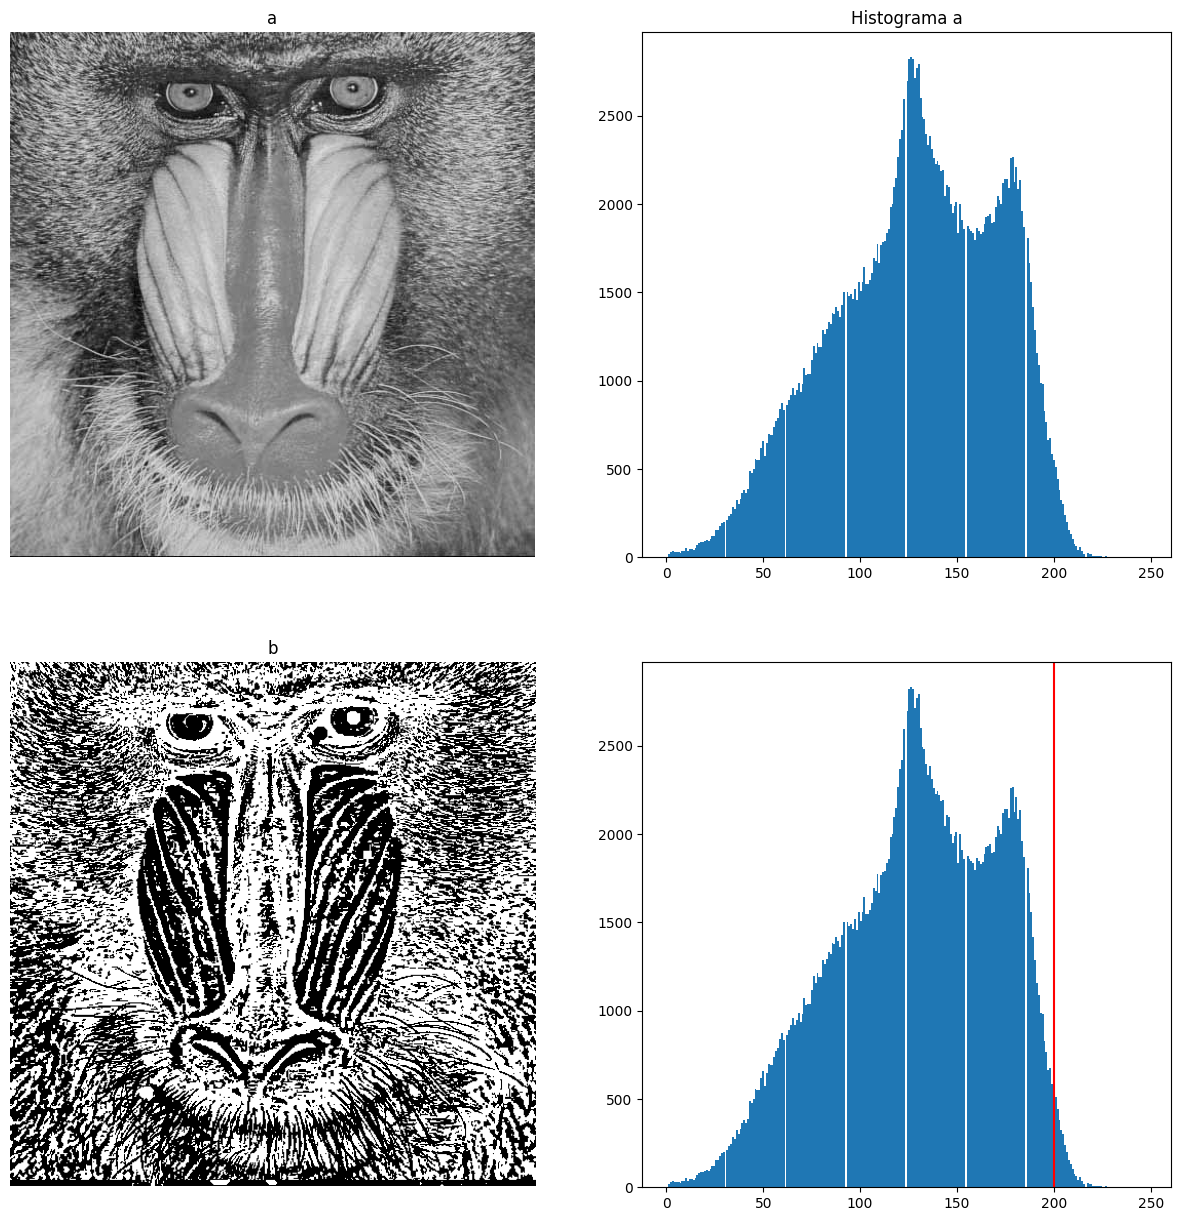

In [43]:
t_baboon = 200
mask_baboon = bernsen(img_baboon, 7, t_baboon).astype(img_baboon.dtype)
plot_figures_in_line(img_baboon, mask_baboon, t_baboon, "a", "b", save_fig="babbon_comparacao.png", save_dir="ResultadosImagens/MetodoGlobal/")

In [44]:
_ = info_segment(mask_baboon)

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 129936/262144 ~= 0.50 %


##### Imagem __fiducial__

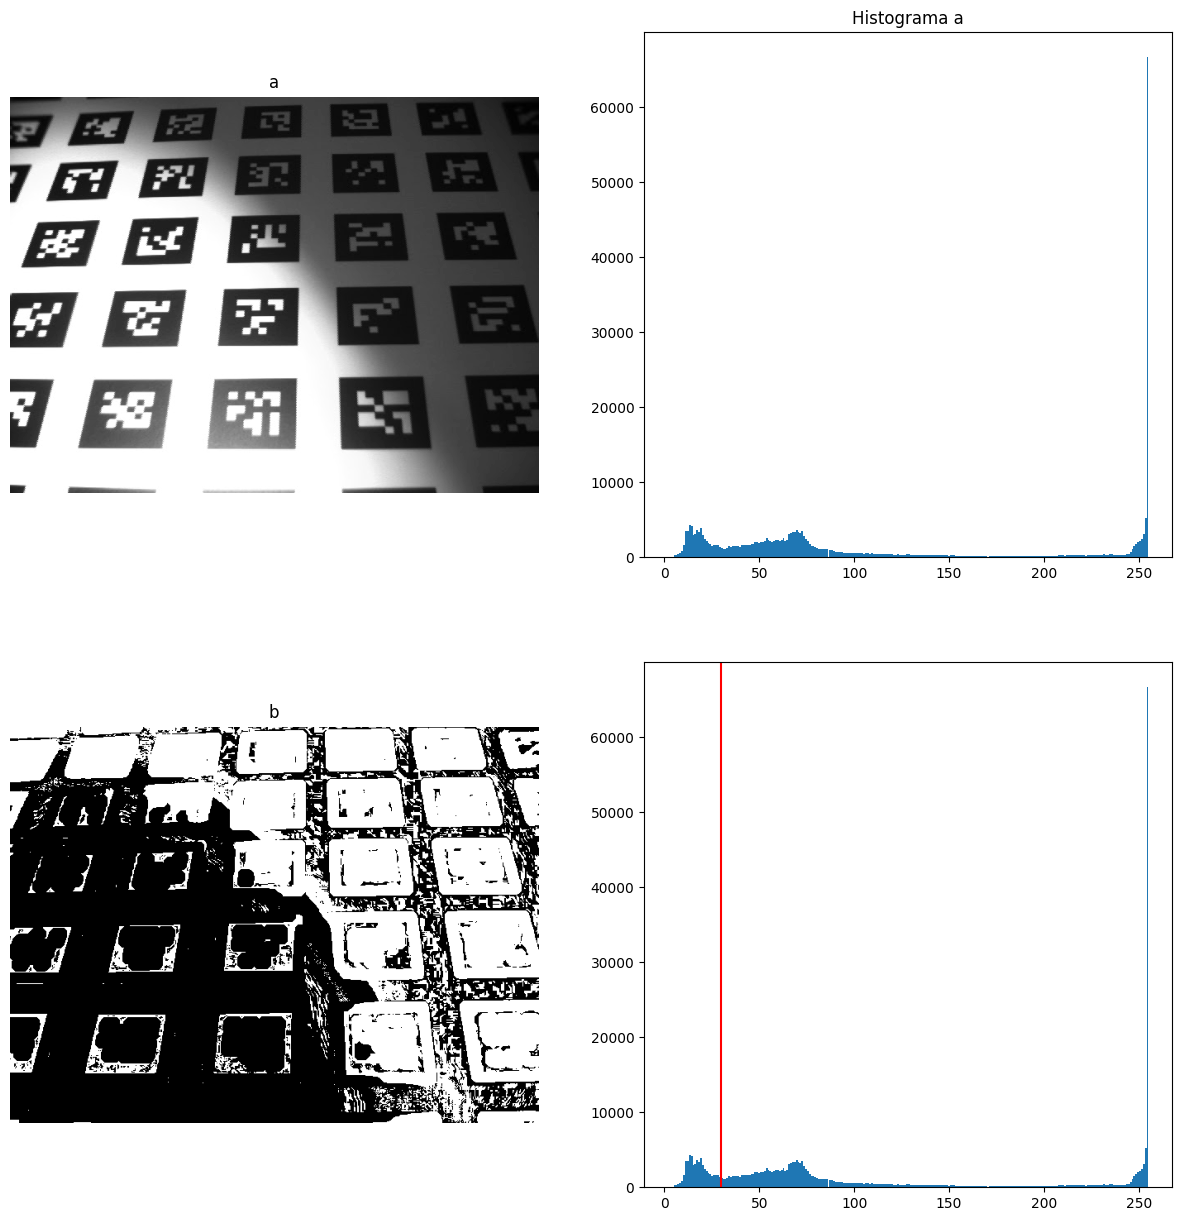

In [47]:
t_fiducial = 30
mask_fiducial = bernsen(img_fiducial, 7, t_fiducial).astype(img_baboon.dtype)
plot_figures_in_line(img_fiducial, mask_fiducial, t_fiducial, "a", "b", save_fig="babbon_comparacao.png", save_dir="ResultadosImagens/MetodoGlobal/")

In [48]:
_ = info_segment(mask_fiducial)

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 177212/307200 ~= 0.58 %


#### Imagem __retina__

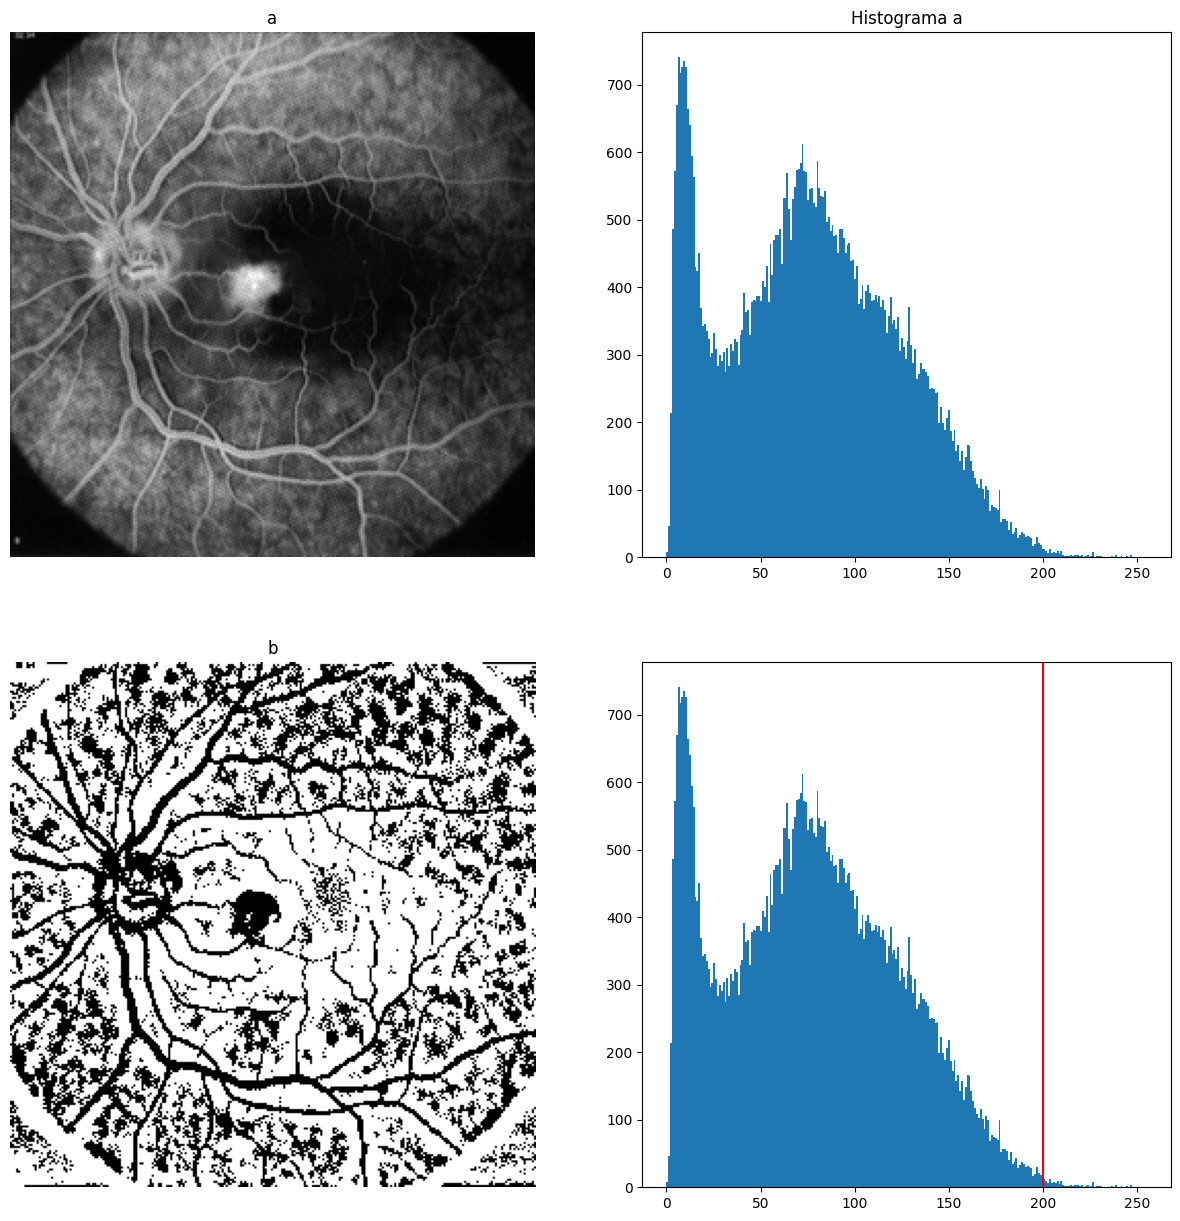

In [49]:
t_retina = 200
mask_retina = bernsen(img_retina, 7, t_retina).astype(img_baboon.dtype)
plot_figures_in_line(img_retina, mask_retina, t_retina, "a", "b", save_fig="babbon_comparacao.png", save_dir="ResultadosImagens/MetodoGlobal/")

In [50]:
_ = info_segment(mask_retina)

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 21996/65536 ~= 0.34 %


##### Imagem __sonnet__

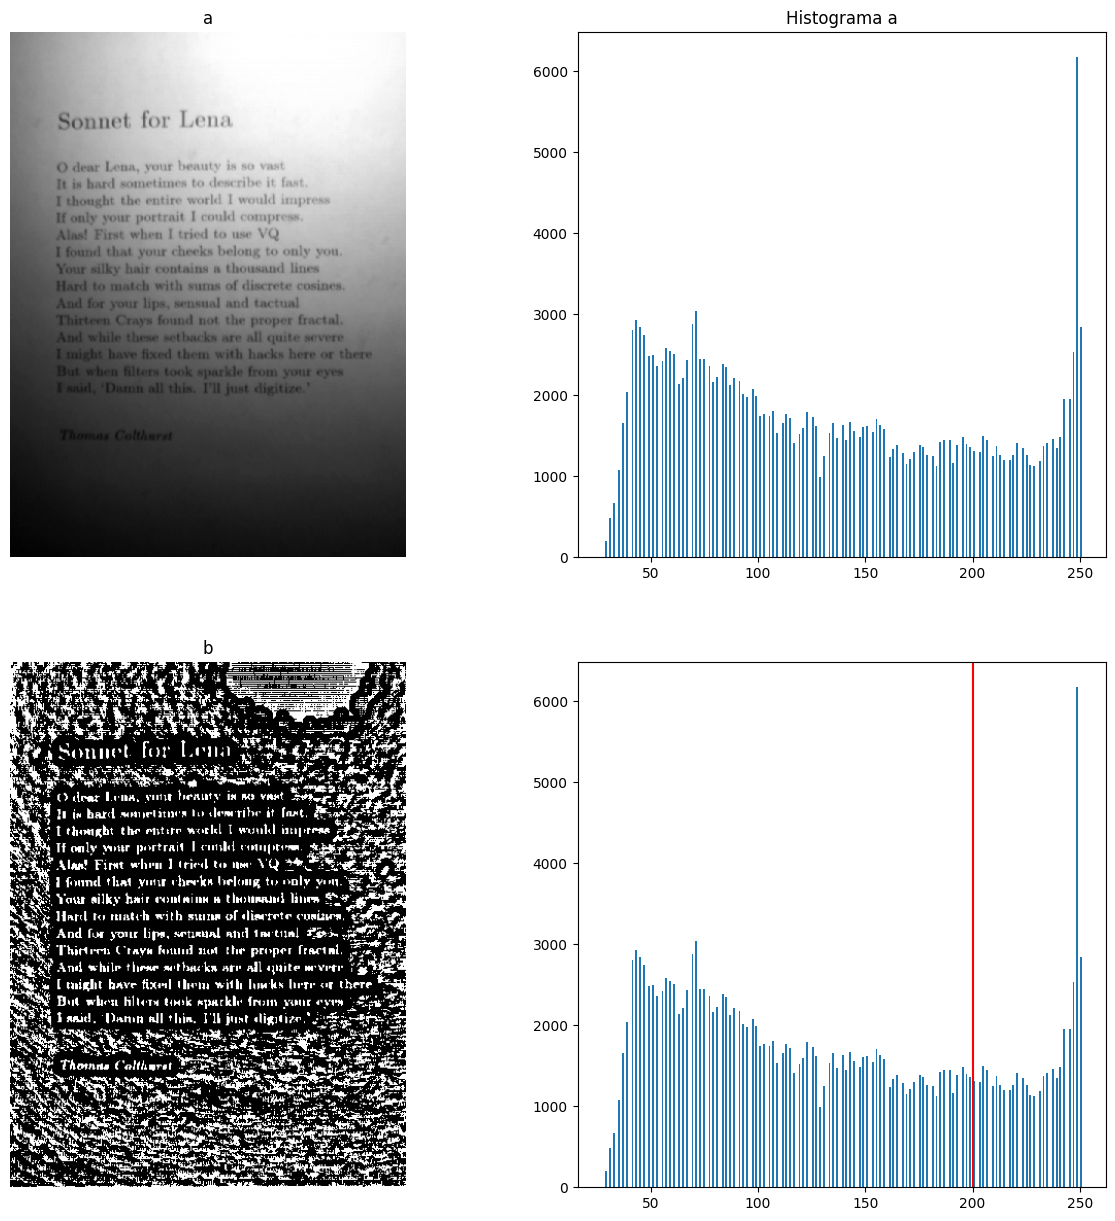

In [51]:
t_sonnet = 200
mask_sonnet = bernsen(img_sonnet, 7, t_sonnet).astype(img_baboon.dtype)
plot_figures_in_line(img_sonnet, mask_sonnet, t_sonnet, "a", "b", save_fig="babbon_comparacao.png", save_dir="ResultadosImagens/MetodoGlobal/")

In [52]:
_ = info_segment(mask_sonnet)

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 141989/195840 ~= 0.73 %


##### Imagem __wedge__

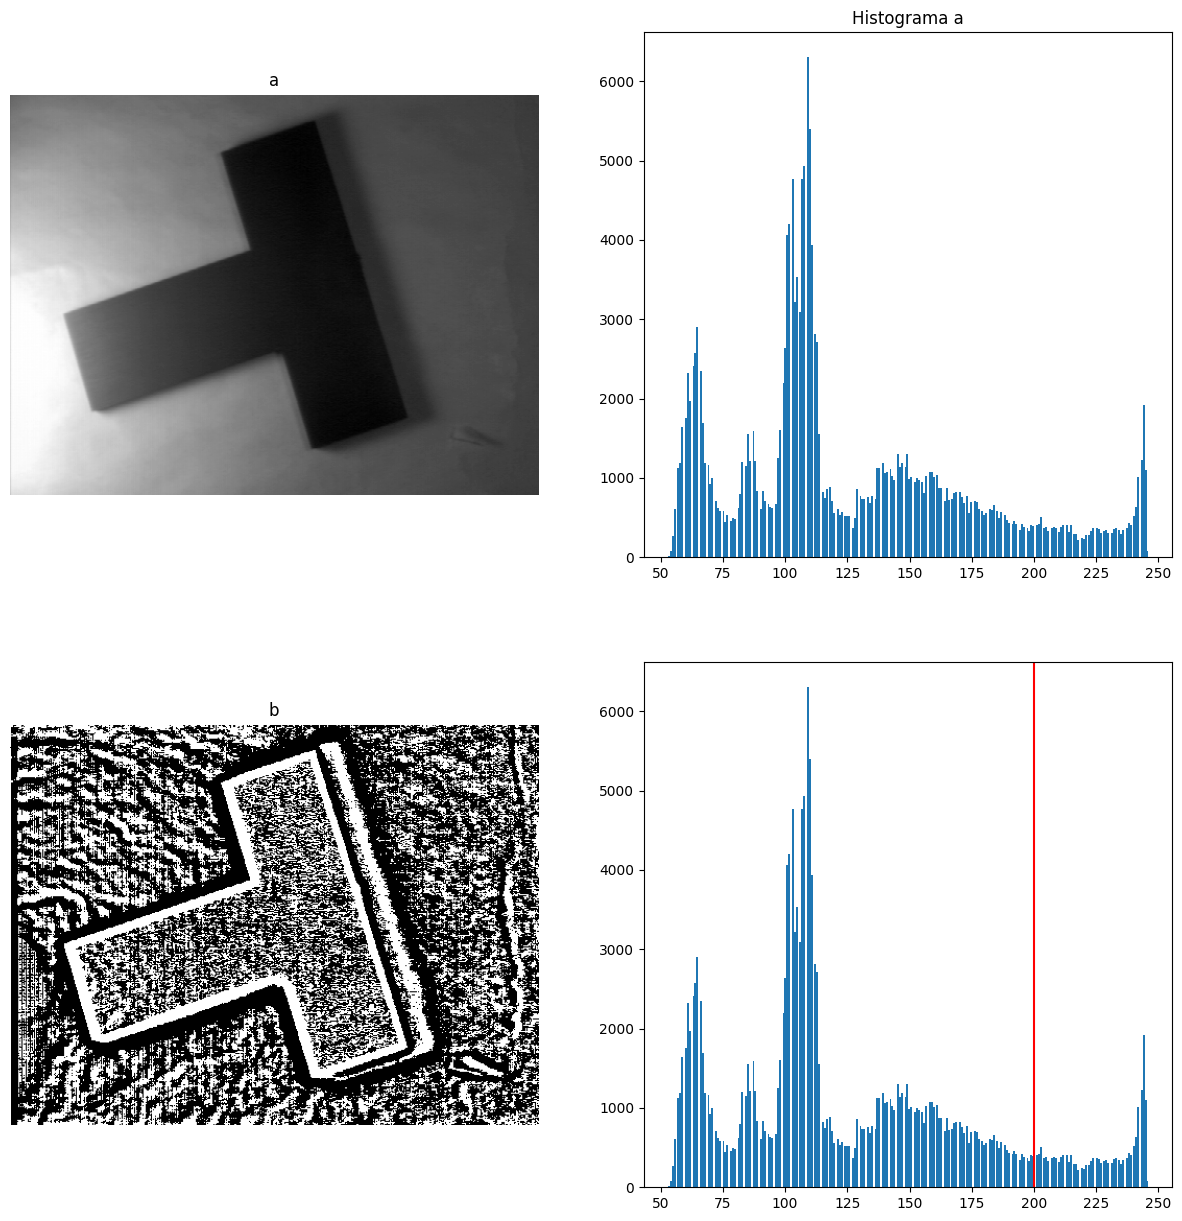

In [53]:
t_wedge = 200
mask_wedge = bernsen(img_wedge, 7, t_wedge).astype(img_baboon.dtype)
plot_figures_in_line(img_wedge, mask_wedge, t_wedge, "a", "b", save_fig="babbon_comparacao.png", save_dir="ResultadosImagens/MetodoGlobal/")

In [54]:
_ = info_segment(mask_wedge)

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 116831/194688 ~= 0.60 %


# Parte 3 : Método de Niblack
https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_niblack_sauvola.html

In [ ]:
% pip install scikit-image

Agora, vamos criar a função para fazer isso

In [ ]:
from skimage.filters import threshold_niblack


def niblack_treshold(img: np.ndarray, window_size: int, k: float) -> np.ndarray:
    binary_mask = (img < threshold_niblack(img, window_size, k)).astype(img.dtype)
    return binary_mask

## Imagem __baboon__

In [ ]:
mask_baboon = niblack_treshold(img_baboon, 25, 0.8)

plot_figures_in_line(img_baboon, "imagem baboon original", mask_baboon, "máscara baboon",
                     save_fig="", save_dir="")

In [ ]:
print("valor mínimo da máscara : {}".format(mask_baboon.min()))
print("valor máximo da máscara : {}".format(mask_baboon.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_baboon)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

## Imagem __fiducial__

In [ ]:
mask_fiducial = niblack_treshold(img_fiducial, 55, 0.4)

plot_figures_in_line(img_fiducial, "imagem fiducial original", mask_fiducial, "máscara fiducial",
                     save_fig="", save_dir="")

In [ ]:
print("valor mínimo da máscara : {}".format(mask_fiducial.min()))
print("valor máximo da máscara : {}".format(mask_fiducial.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_fiducial)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

## Imagem __retina__

In [ ]:
mask_retina = niblack_treshold(img_retina, 33, 0.04)

plot_figures_in_line(img_retina, "imagem retina original", mask_retina, "máscara retina",
                     save_fig="", save_dir="")

In [ ]:
print("valor mínimo da máscara : {}".format(mask_retina.min()))
print("valor máximo da máscara : {}".format(mask_retina.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_retina)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

## Imagem __sonnet__

In [ ]:
mask_sonnet = niblack_treshold(img_sonnet, 25, 0.8)

plot_figures_in_line(img_sonnet, "imagem sonnet original", mask_sonnet, "máscara sonnet",
                     save_fig="", save_dir="")

In [ ]:
print("valor mínimo da máscara : {}".format(mask_sonnet.min()))
print("valor máximo da máscara : {}".format(mask_sonnet.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_sonnet)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

## Imagem __wedge__

In [ ]:
mask_wedge = niblack_treshold(img_wedge, 25, 0.8)

plot_figures_in_line(img_wedge, "imagem wedge original", mask_wedge, "máscara wedge",
                     save_fig="", save_dir="")

In [ ]:
print("valor mínimo da máscara : {}".format(mask_wedge.min()))
print("valor máximo da máscara : {}".format(mask_wedge.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_wedge)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

# Parte 4 : Método de Sauvola e Pietaksinen
https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_niblack_sauvola.html

Agora, vamos escrever uma função para facilitar o uso da __sauvola__

In [ ]:
from skimage.filters import threshold_sauvola


def sauvola_treshold(img: np.ndarray, window_size: int) -> np.ndarray:
    """

    :param img:
    :param window_size:
    :return:
    """
    binary_mask = (img < threshold_sauvola(img, window_size=window_size)).astype(img.dtype)
    return binary_mask


## Imagem __baboon__

In [ ]:
mask_baboon = sauvola_treshold(img_baboon, 25)

plot_figures_in_line(img_baboon, "imagem baboon original", mask_baboon, "máscara baboon",
                     save_fig="", save_dir="")

In [ ]:
print("valor mínimo da máscara : {}".format(mask_baboon.min()))
print("valor máximo da máscara : {}".format(mask_baboon.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_baboon)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

## Imagem __fiducial__

In [ ]:
mask_fiducial = sauvola_treshold(img_fiducial, 25)

plot_figures_in_line(img_fiducial, "imagem fiducial original", mask_fiducial, "máscara fiducial",
                     save_fig="", save_dir="")

In [ ]:
print("valor mínimo da máscara : {}".format(mask_fiducial.min()))
print("valor máximo da máscara : {}".format(mask_fiducial.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_fiducial)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

## Imagem __retina__

In [ ]:
mask_retina = sauvola_treshold(img_retina, 33)

plot_figures_in_line(img_retina, "imagem retina original", mask_retina, "máscara retina",
                     save_fig="", save_dir="")

In [ ]:
print("valor mínimo da máscara : {}".format(mask_retina.min()))
print("valor máximo da máscara : {}".format(mask_retina.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_retina)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

## Imagem __sonnet__

In [ ]:
mask_sonnet = sauvola_treshold(img_sonnet, 33)

plot_figures_in_line(img_sonnet, "imagem sonnet original", mask_sonnet, "máscara sonnet",
                     save_fig="", save_dir="")

In [ ]:
print("valor mínimo da máscara : {}".format(mask_sonnet.min()))
print("valor máximo da máscara : {}".format(mask_sonnet.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_sonnet)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

## Imagem __wedge__

In [ ]:
mask_wedge = sauvola_treshold(img_wedge, 33)

plot_figures_in_line(img_wedge, "imagem wedge original", mask_wedge, "máscara wedge",
                     save_fig="", save_dir="")

In [ ]:
print("valor mínimo da máscara : {}".format(mask_wedge.min()))
print("valor máximo da máscara : {}".format(mask_wedge.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_wedge)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

# Parte 5 : Método de Phansalskar, More e Sabale
TODO : Para os outros métodos, o skimage já tem os filtros de média e contraste
https://scikit-image.org/docs/dev/auto_examples/applications/plot_thresholding.html#sphx-glr-auto-examples-applications-plot-thresholding-py

In [ ]:
def more_threshold(img: np.ndarray, k: float, r: float, n: int, p: int, q: int) -> np.ndarray:
    dx, dy = img.shape[0], img.shape[1]
    img_mask = np.zeros(shape=(dx, dy), dtype=img.dtype)

    # calculando o raio da visinhança
    w = int((n - 1) / 2)
    r *= 255

    for i in range(w + 1, dx):
        for j in range(w + 1, dy - w):
            # Extraindo a janela desejada
            block_img = img[i - w:i + w, j - w:j + w]

            # Calculando a média e o desvido padrão da janela nxn
            mean_block = block_img.mean()
            std_block = block_img.std()

            ph = p * np.exp(-q * mean_block)
            treshold = (mean_block * (1 + ph + k * ((std_block / r) - 1))).astype(img.dtype)

            if (img[i, j] < treshold):
                img_mask[i, j] = 0
            else:
                img_mask[i, j] = 1

    return img_mask

## Imagem __babbon__

In [ ]:
img_mask = more_threshold(img_baboon, 0.25, 0.5, 3, 2, 10)

plot_figures_in_line(img_baboon, "imagem sonnet original", mask_baboon, "máscara sonnet",
                     save_fig="", save_dir="")

In [ ]:
_, _, _ = info_segment(mask_baboon)

## Parte 6 : Método do contraste

Inicialmente, vamos definir a função __bimodial histogram__ do scikit-image

In [ ]:
from skimage.filters import threshold_minimum


def contrast_threshold(img: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    threshold_min = threshold_minimum(img)
    binary_mask = (img < threshold_min).astype(img.dtype)

    return binary_mask, threshold_min


## Aplicando na imagem __babbon__

In [ ]:
mask_baboon, t_baboon = contrast_threshold(img_baboon)

plot_figures_in_line(img_baboon, "imagem retina original", mask_baboon, "máscara retina",
                     save_fig="", save_dir="")

In [ ]:
plot_histogrms_in_line(img_baboon, mask_baboon, t_baboon)

In [ ]:
_, _, _ = info_segment(mask_baboon)

## Imagem __fiducial__

In [ ]:
mask_fiducial, t_fiducial = contrast_threshold(img_fiducial)

plot_figures_in_line(img_fiducial, "imagem retina original", mask_fiducial, "máscara retina",
                     save_fig="", save_dir="")

In [ ]:
plot_histogrms_in_line(img_fiducial, mask_fiducial, t_fiducial)

In [ ]:
_, _, _ = info_segment(mask_fiducial)

# Parte 7 : Método da média
https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.threshold_local

In [ ]:
from skimage.filters import threshold_local


def local_treshold(img: np.ndarray, block_size: int, method: str = "mean", mode="reflect") -> np.ndarray:
    binary_mask = (img < threshold_local(img, block_size=block_size, method=method, mode=mode)).astype(img.dtype)
    return binary_mask

## Imagem __baboon__

In [ ]:
mask_baboon = local_treshold(img_baboon, block_size=55, method="mean", mode="reflect")

plot_figures_in_line(img_baboon, "imagem retina original", mask_baboon, "máscara retina",
                     save_fig="", save_dir="")

In [ ]:
_, _, _ = info_segment(mask_baboon)

# Parte 8 : Método da mediana

## Imagem __baboon__

In [ ]:
mask_baboon = local_treshold(img_baboon, block_size=55, method="median", mode="reflect")

plot_figures_in_line(img_baboon, "imagem retina original", mask_baboon, "máscara retina",
                     save_fig="", save_dir="")

In [ ]:
_, _, _ = info_segment(mask_baboon)